In [2]:
## Load packages (installation is needed)
import pandas as pd
import datetime
#from datetime import datetime

## Load scipy packet for fft signal analysis
import scipy as sp
import scipy.fftpack
from scipy import signal

## Load numpy for array and fft period analysis
import numpy as np
from numpy.fft import fft, ifft

import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from pyproj import Proj
#from scipy.fft import fft, fftfreq

#pd.set_option('display.max_rows', None)

In [3]:
## input data
## Set input data
## =================================================================================
data = pd.read_csv("data/A_BIG.csv", sep=";")
## =================================================================================


##  Μαke data and panda dataframe
data["dates"]
data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))

## set date as index to dataframe
data = data.set_index(['date'])

## Plot dataframe to check data
data


,code,X,Y,Z,Hz,V,S,hsta,htarg,dates,h,min,sec,ddate,time
date,,,,,,,,,,,,,,,
2022-04-03 10:14:35.870,A1,126.2513,110.7523,18.8394,75.2515,84.1735,29.2678,1.638,0,3/4/2022,10,14,35.87,2022-04-03,10:14:35.87
2022-04-03 10:14:36.250,A2,126.2504,110.7518,18.8394,75.2519,84.1729,29.2668,1.638,0,3/4/2022,10,14,36.25,2022-04-03,10:14:36.25
2022-04-03 10:14:36.840,A3,126.2504,110.7518,18.8394,75.2518,84.1730,29.2668,1.638,0,3/4/2022,10,14,36.84,2022-04-03,10:14:36.84
2022-04-03 10:14:37.350,A4,126.2494,110.7515,18.8391,75.2516,84.1731,29.2658,1.638,0,3/4/2022,10,14,37.35,2022-04-03,10:14:37.35
2022-04-03 10:14:38.520,A5,126.2495,110.7514,18.8389,75.2520,84.1734,29.2658,1.638,0,3/4/2022,10,14,38.52,2022-04-03,10:14:38.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03 10:32:11.740,A1800,126.2506,110.7509,18.8397,75.2539,84.1722,29.2668,1.638,0,3/4/2022,10,32,11.74,2022-04-03,10:32:11.74
2022-04-03 10:32:12.300,A1801,126.2506,110.7509,18.8396,75.2539,84.1724,29.2668,1.638,0,3/4/2022,10,32,12.30,2022-04-03,10:32:12.3
2022-04-03 10:32:12.880,A1802,126.2506,110.7508,18.8398,75.2541,84.1719,29.2668,1.638,0,3/4/2022,10,32,12.88,2022-04-03,10:32:12.88


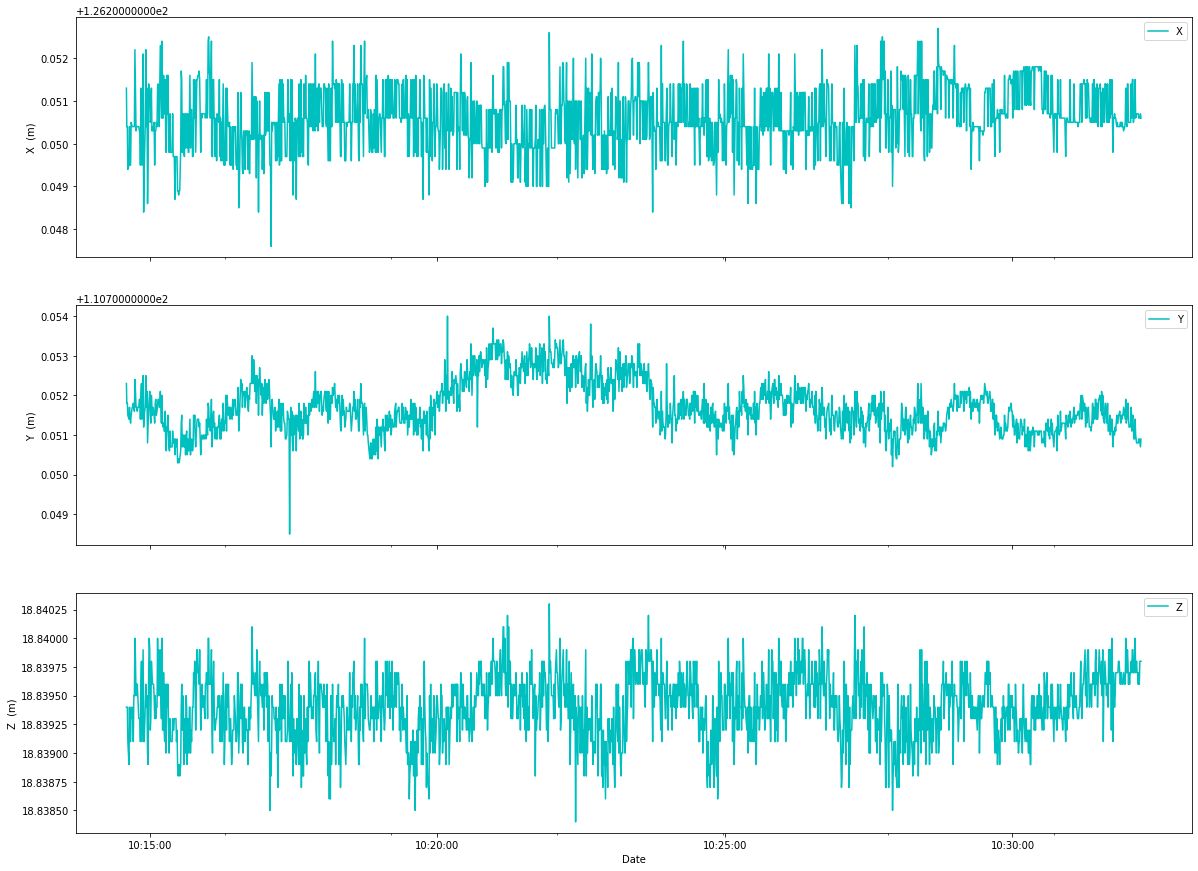

In [4]:
## make time series for the three axes
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)

plot_cols = ['X', 'Y', 'Z' ]

data[plot_cols].plot(subplots=True, ax=axes, marker=' ', color='c')

month_day_formatter = mdates.DateFormatter("%H:%M:%S")

for ax, col in zip(axes, plot_cols):
    # add axis labels
    ax.set_ylabel(col + '  (m)')
    ax.set_xlabel('Date')
    ax.xaxis.set_major_formatter(month_day_formatter)

## Save the figure
## =================================================================================
fig.savefig("Outputs/ts/timeseries_T8.png")
## =================================================================================

In [5]:
## set the column for FFT PSD analysis
## =================================================================================
temp = data['Y']
## =================================================================================

## Count thw aarray length
N = len(temp)

## Plot temporary array
#temp


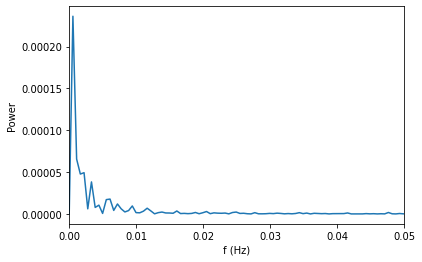

In [7]:
# Estimate power spectral density using a periodogram
f, Pxx = signal.periodogram(temp)

# lets plot this periodogram
plt.plot(f, Pxx)
plt.xlim(0, 0.05)
plt.ylabel('Power')
plt.xlabel('f (Hz)')
## Save priodogram
## =================================================================================
plt.savefig("Outputs/periodogram/periodograms_T8_Y.png")
## =================================================================================

In [183]:
## Take three powerfull period for the analysis
top_3_periods = {}

# get indices for 3 highest Pxx values
top3_freq_indices = np.flip(np.argsort(Pxx), 0)[0:3]

# use indices from previous step to
# get 3 frequencies with highest power
freqs = f[top3_freq_indices]

# use same indices to get powers as well
power = Pxx[top3_freq_indices]

# we are interested in period and it is calculated as 1/frequency 
periods = 1 / np.array(freqs)

# populate dict with calculated values
top_3_periods['period1'] = periods[0]
top_3_periods['freq1'] = freqs[0]
top_3_periods['power1'] = power[0]

top_3_periods['period2'] = periods[1]
top_3_periods['freq2'] = freqs[1]
top_3_periods['power2'] = power[1]

top_3_periods['period3'] = periods[2]
top_3_periods['freq3'] = freqs[2]
top_3_periods['power3'] = power[2]

## Resulte for three first frequencies
top_3_periods

{'period1': 1804.0,
 'freq1': 0.0005543237250554324,
 'power1': 0.00023630658418262015,
 'period2': 902.0,
 'freq2': 0.0011086474501108647,
 'power2': 6.55946844565327e-05,
 'period3': 451.0,
 'freq3': 0.0022172949002217295,
 'power3': 4.92736843946338e-05}

In [194]:
## estimate fft and psd arrays
tempa=np.array(temp)
temp_fft = sp.fftpack.fft(tempa)
temp_psd = np.abs(temp_fft) ** 2

## Set period 
## =================================================================================
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 451 )
## =================================================================================


## take only positive frequencies
i = fftfreq > 0

## Print frequencies
#print(fftfreq)


In [195]:
x = list(range(len(data.index)))
y = data['Y']
# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(temp))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
#plt.semilogy(freq,nspectrum)


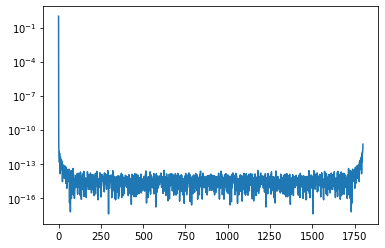

In [196]:
# improve the plot by convertint the data into grouped per week to avoid peaks
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/1800)
plt.semilogy(results['period'], results['nspectrum'])

## Save spectrum analysis

plt.savefig("Outputs/spectrume/spectrum_T8_Y_period3.png")

In [156]:
#results['period_round'] = results['period'].round()
#grouped_week = results.groupby('period_round')['nspectrum'].sum()
#plt.semilogy(grouped_week.index, grouped_week)
#plt.xticks([1, 500, 1000, 1500, 1800])

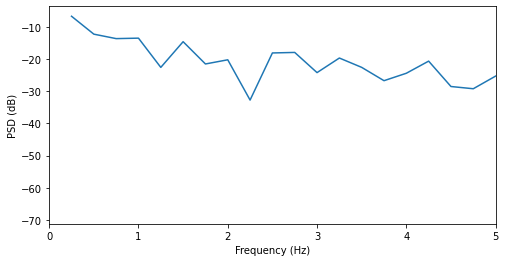

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (dB)')
## =================================================================================
fig.savefig("Outputs/fftfreq_ts/fftfreq_T8_Period3.png")
## =================================================================================


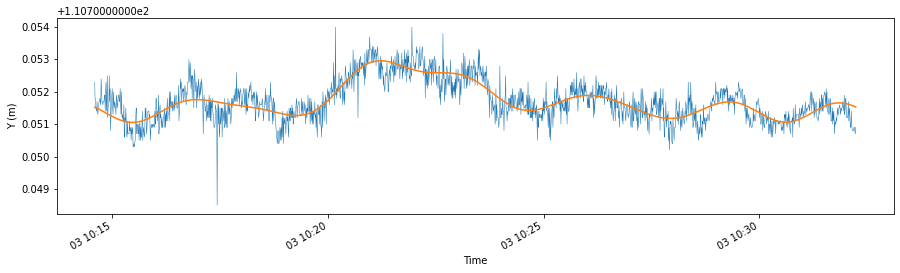

In [198]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 2 ] = 0

date= pd.to_datetime(data.index)
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
#ax.set_xlim(datetime.date(1994, 1, 1),
#            datetime.date(2000, 1, 1))
#ax.set_ylim(18.838, 18.841)
ax.set_xlabel('Time')
## Set Y Axis, the column for fft analysis
## =================================================================================
ax.set_ylabel('Y (m)')
## =================================================================================

## Save time-series with fft frequencies
## =================================================================================
fig.savefig("Outputs/fftfreq_ts/ts_fftfeq_T8_Period3.png")
## =================================================================================
